### SÉRIE DE FOURIER

In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
import scipy as sp
import pandas as pd

In [2]:
x1 = 1
x2 = 2
x3 = 4
fx1 = 0.3
fx2 = -0.2
fx3 = -0.5

A = np.array([[1/2, mt.cos(x1), mt.sin(x1)],[1/2, mt.cos(x2), mt.sin(x2)],[1/2, mt.cos(x3), mt.sin(x3)]])
print(A)
B = np.array([[fx1], [fx2], [fx3]])
A_inversa = np.linalg.inv(A)
X = np.dot(A_inversa, B)
print(X)

[[ 0.5         0.54030231  0.84147098]
 [ 0.5        -0.41614684  0.90929743]
 [ 0.5        -0.65364362 -0.7568025 ]]
[[-0.14875579]
 [ 0.53017659]
 [ 0.10448639]]


In [3]:
verify1 = (-0.14875579/2) + (0.53017659*mt.cos(1)) + (0.10448639*mt.sin(1))
print(verify1)
verify2 = (-0.14875579/2) + (0.53017659*mt.cos(2)) + (0.10448639*mt.sin(2))
print(verify2)
verify3 = (-0.14875579/2) + (0.53017659*mt.cos(4)) + (0.10448639*mt.sin(4))
print(verify3)

0.30000000458662923
-0.20000000017454672
-0.50000000166244


In [4]:
file = 'séries e transformadas - dados.csv'
df = pd.read_csv(file, sep = ';', engine='python')
dados = df.replace({',': '.'}, regex=True)
x = dados['x'].values
x = x.astype(float)
y = dados['y'].values
y = y.astype(float)

#### Aproximação por Quadrados Mínimos

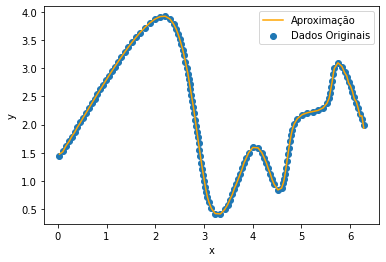

In [5]:
N = len(x)

A = np.column_stack([np.ones(N), x])

ordens = range(0, 50)

coeficientes = []

for ordem in ordens:
    N = len(x)
    A = np.zeros((N, 2*ordem + 1))

    for i in range(N):
        A[i, 0] = 0.5

        for k in range(1, ordem + 1):
            A[i, 2*k - 1] = np.cos(k * x[i])
            A[i, 2*k] = np.sin(k * x[i])

    b = y

    # Resolva o sistema de equações lineares utilizando mínimos quadrados
    coeficiente, residual, _, _ = np.linalg.lstsq(A, b, rcond=None)
    coeficientes.append(coeficiente)

coefficients, residuals, _, _ = np.linalg.lstsq(A, y, rcond=None)
approximation = np.dot(A, coefficients)
plt.scatter(x, y, label='Dados Originais')
plt.plot(x, approximation, label='Aproximação', color= 'orange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Aproximação Série de Fourier

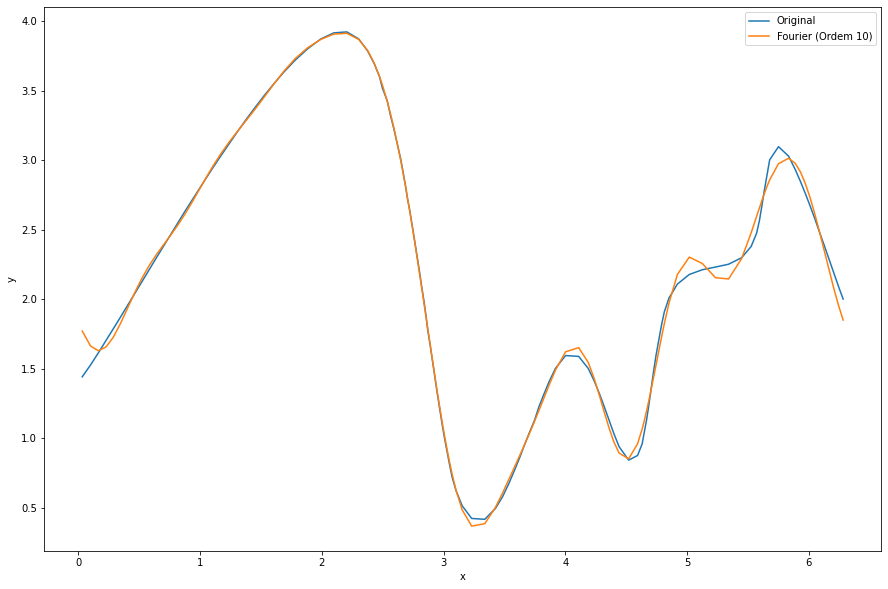

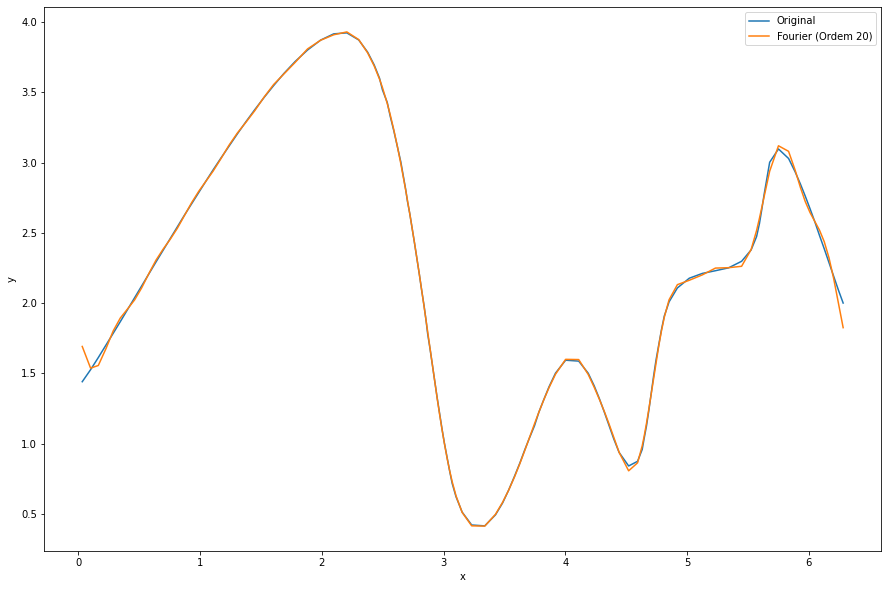

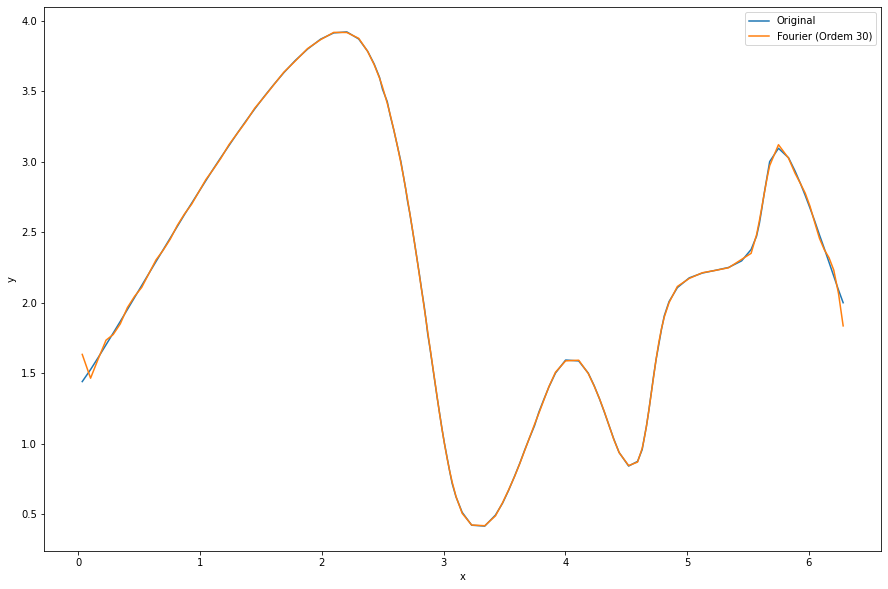

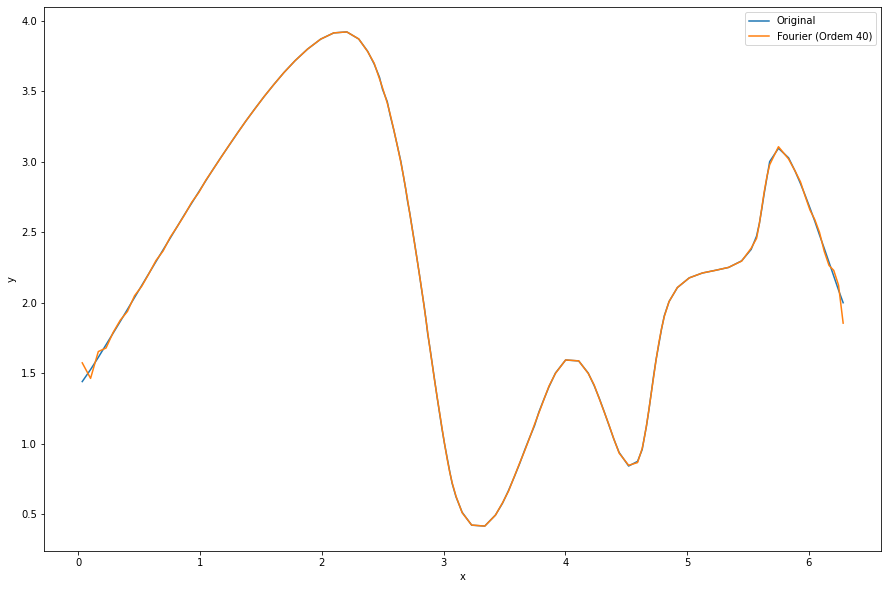

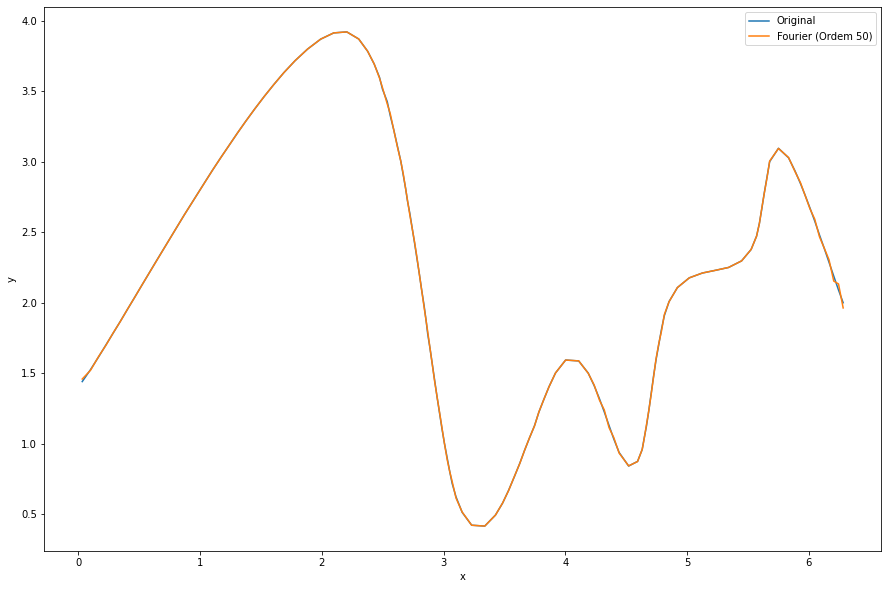

In [6]:
K = 0

while(K<50):
    K+=10
    ordens = range(1, K+1)
    coeficientes = []

    for ordem in ordens:
        N = len(x)
        A = np.zeros((N, 2*ordem + 1))

        for i in range(N):
            A[i, 0] = 0.5

            for k in range(1, ordem + 1):
                A[i, 2*k - 1] = np.cos(k * x[i])
                A[i, 2*k] = np.sin(k * x[i])

        b = y

        # Resolvendo o sistema de equações lineares utilizando mínimos quadrados
        coeficiente, residual, _, _ = np.linalg.lstsq(A, b, rcond=None)
        coeficientes.append(coeficiente)

    def serie_fourier(x, coeficiente, ordem):
        series = coeficiente[0] / 2

        for k in range(1, ordem + 1):
            series += coeficiente[2*k - 1] * np.cos(k * x) + coeficiente[2*k] * np.sin(k * x)

        return series

    valor_serie = []

    for i, ordem in enumerate(ordens):
        series = serie_fourier(x, coeficientes[i], ordem)
        valor_serie.append(series)

    melhor_erro = float('inf')

    for i, ordem in enumerate(ordens):
        erro = np.mean((y - valor_serie[i]) ** 2)

        if erro < melhor_erro:
            melhor_ordem = ordem
            melhor_erro = erro

    melhor_serie = valor_serie[i]

    plt.figure(figsize=(15, 10))
    plt.plot(x, y, label='Original')
    plt.plot(x, melhor_serie, label=f'Fourier (Ordem {melhor_ordem})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

### Aproximação por Mínimos Quadrados

In [33]:
# Grau máximo do polinômio

grau = 10

In [34]:
# Matriz do sistema de equações lineares

N = len(x)
A = np.zeros((N, grau + 1))

for i in range(N):
    for j in range(grau + 1):
        A[i, j] = x[i] ** j

In [35]:
# Matriz transposta de A

A_T = np.transpose(A)

In [36]:
# Matriz inversa de A

A_pinv = np.linalg.inv(A_T @ A) @ A_T

In [37]:
# Coeficientes usando matriz inversa

coeficientes = A_pinv @ y

In [38]:
# Aproximação da função polinomial

aproximacao = np.dot(A, coeficientes)

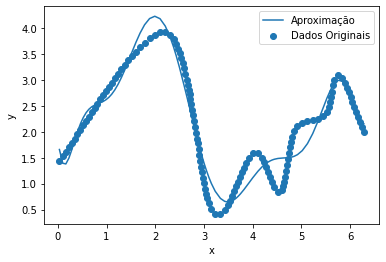

In [39]:
# Plota a função original e a aproximação

plt.scatter(x, y, label='Dados Originais')
plt.plot(x, aproximacao, label='Aproximação')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Aproximação pela Série de Fourier

In [14]:
max_order = 5  # Número máximo de termos


In [15]:
coefficients = []
for order in range(0, max_order + 1):
    a0 = np.mean(y)
    ak = np.zeros(order)
    bk = np.zeros(order)
    for k in range(1, order + 1):
        ak[k-1] = np.mean(y * np.cos(k * x))
        bk[k-1] = np.mean(y * np.sin(k * x))
    coefficients.append((a0, ak, bk))

In [16]:
approximations = []
for order in range(0, max_order + 1):
    a0, ak, bk = coefficients[order]
    approximation = a0 / 2
    for k in range(1, order + 1):
        approximation += ak[k-1] * np.cos(k * x) + bk[k-1] * np.sin(k * x)
    approximations.append(approximation)

In [17]:
errors = [np.mean((y - approx) ** 2) for approx in approximations]
best_order = np.argmin(errors)
best_approximation = approximations[best_order]

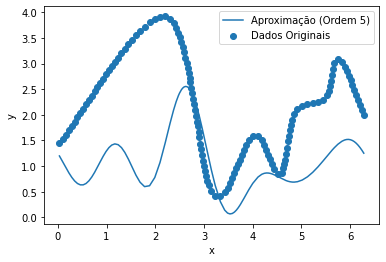

In [18]:
plt.scatter(x, y, label='Dados Originais')
plt.plot(x, best_approximation, label=f'Aproximação (Ordem {best_order})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()